In [1]:
import pickle as pkl

file_dir1 = 'result/cnn_result/Time_pred_slice_1_52.pkl'
res_pred1 = []
with open(file_dir1, 'rb') as f1:
    data_1 = pkl.load(f1)
    for ele in data_1:
        for i in range(len(ele)):
            res_pred1.append(ele[i])
print(len(res_pred1))

1068468


In [2]:
file_dir2 = 'result/target_pred_33_res.pkl'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
res_pred2 = data_2
print(len(res_pred2))

1068215


In [2]:
file_dir2 = 'result/cnn_result/pred_target_merge_z_0_33.pkl'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
    for ele in data_2:
        for i in range(len(ele)):
            res_pred2.append(ele[i])
print(len(res_pred2))

1068468


In [1]:
import pickle as pkl
file_dir2 = 'data/cnn_result_slice/merge_ng33sz_grid_28jun_154331.p701.ht'
res_pred2 = []
with open(file_dir2, 'rb') as f2:
    data_2 = pkl.load(f2)
    for ele in data_2:
        res_pred2.append(ele)
print(len(res_pred2))
print(res_pred2[100000:110000])

1068468
[0.416805624961853, 0.41906076669692993, 0.4090960621833801, 0.40220168232917786, 0.40659064054489136, 0.4136870503425598, 0.4045608937740326, 0.3878263831138611, 0.3847464323043823, 0.3878990411758423, 0.3811013102531433, 0.3711845278739929, 0.36732256412506104, 0.335578978061676, 0.35788875818252563, 0.3703295588493347, 0.37675556540489197, 0.3822144865989685, 0.4134034514427185, 0.4230407476425171, 0.378834992647171, 0.34714585542678833, 0.3253258168697357, 0.31248125433921814, 0.38724225759506226, 0.33694928884506226, 0.3884647488594055, 0.3837810158729553, 0.35826319456100464, 0.33657771348953247, 0.32820022106170654, 0.34825074672698975, 0.34138867259025574, 0.3617751896381378, 0.41906824707984924, 0.424674928188324, 0.4282200336456299, 0.4798215925693512, 0.509703516960144, 0.5382875800132751, 0.5454393029212952, 0.5277435779571533, 0.5211641788482666, 0.5015897750854492, 0.4904826283454895, 0.467739075422287, 0.46556466817855835, 0.49019771814346313, 0.5049550533294678,

In [3]:
point_file = 'data/ng33sz_grid_28jun_154331.p701'
with open(point_file, 'r') as f:
    line = f.readline()
    count = 0
    cur_line_num = 629
    cur_cdp_num = 1190
    res = []
    while line and line != []:
        count += 1

        line_split = line[:-1].split(' ')
        line_split = [value for loc, value in enumerate(line_split) if value != '']
        line_num = int(line_split[4])
        cdp_num = int(line_split[3][:4])

        if cur_cdp_num == cdp_num and cur_line_num == line_num:
            if cur_cdp_num == 1851:
                cur_line_num += 1
                cur_cdp_num = 1190
            else:
                cur_cdp_num += 1
        else:
            # if cur_cdp_num == 1851:
            #     cur_line_num += 1
            #     cur_cdp_num = 1190
            # else:
            while cur_cdp_num != cdp_num:
                res.append(count - 1)
                #print(cur_line_num, cur_cdp_num, line_num, cdp_num)
                if cur_cdp_num == 1851:
                    cur_cdp_num = 1190
                    cur_line_num += 1
                else:
                    cur_cdp_num += 1
            if cur_cdp_num == 1851:
                cur_line_num += 1
                cur_cdp_num = 1190
            else:
                cur_cdp_num += 1
        line = f.readline()
    print(len(res))
    print(count)

for ele in res:
    res_pred2.insert(ele, 0)
print(len(res_pred2))

253
1068215
1068468


In [3]:
import numpy as np

pred_1 = np.array(res_pred1)
pred_2 = np.array(res_pred2)

pred_merge = pred_1 + pred_2
#pred_merge = np.sqrt(pred_merge)
pred_merge = pred_merge/2
print(len(pred_merge))

1068468


In [2]:
#pred_all = pred_merge
pred_all = res_pred1
cur_line_num = 629
cur_cdp_num = 1190
file_save = 'result/E2_52.txt'
with open(file_save, 'w') as fs:
    head = 'line '+'cdp '+'value'+'\n'
    fs.write(head)
    for i in range(len(pred_all)):
        cur_data = str(cur_line_num) + ' ' + str(cur_cdp_num) + ' ' + str(pred_all[i]) + '\n'
        fs.write(cur_data)
        if cur_cdp_num == 1851:
            cur_line_num += 1
            cur_cdp_num = 1190
        else:
            cur_cdp_num += 1
    print(cur_line_num)
    print(cur_cdp_num)

2243
1190


In [63]:
# test_a = pred_merge
pred_merge = []
for ele in test_a:
    if ele > 0.32:
        pred_merge.append(1)
    else:
        pred_merge.append(0)
print(len(pred_merge))

1068468


In [2]:
import numpy as np
pred_merge = res_pred2
pred = np.reshape(pred_merge, (1614, 662))
pred_new = [pred.T[i] for i in range(len(pred.T)-1, -1, -1)]
print(np.shape(pred_new))
import matplotlib.pyplot as plt
im = plt.imshow(pred_new)
plt.colorbar(im, fraction=0.019, pad=0.05)
#fig.colorbar(im, cax=cax)

(662, 1614)


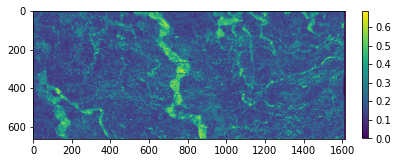

In [3]:
#plt.savefig('image/E2+birnn_52.png', dpi=1000)

plt.show()

In [4]:
import pickle as pkl
with open("/disk3/zhao/oil_cnn_clean/data_prepare/mean_std.pkl", 'rb') as file:
        Cur_paras = pkl.load(file)
print(Cur_paras)

[1.1080261478506959, 466.37244638215867]
